<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 3

### Regression and Classification with the Ames Housing Data

---

You have just joined a new "full stack" real estate company in Ames, Iowa. The strategy of the firm is two-fold:
- Own the entire process from the purchase of the land all the way to sale of the house, and anything in between.
- Use statistical analysis to optimize investment and maximize return.

The company is still small, and though investment is substantial the short-term goals of the company are more oriented towards purchasing existing houses and flipping them as opposed to constructing entirely new houses. That being said, the company has access to a large construction workforce operating at rock-bottom prices.

This project uses the [Ames housing data recently made available on kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Estimating the value of homes from fixed characteristics.

---

Your superiors have outlined this year's strategy for the company:
1. Develop an algorithm to reliably estimate the value of residential houses based on *fixed* characteristics.
2. Identify characteristics of houses that the company can cost-effectively change/renovate with their construction team.
3. Evaluate the mean dollar value of different renovations.

Then we can use that to buy houses that are likely to sell for more than the cost of the purchase plus renovations.

Your first job is to tackle #1. You have a dataset of housing sale data with a huge amount of features identifying different aspects of the house. The full description of the data features can be found in a separate file:

    housing.csv
    data_description.txt
    
You need to build a reliable estimator for the price of the house given characteristics of the house that cannot be renovated. Some examples include:
- The neighborhood
- Square feet
- Bedrooms, bathrooms
- Basement and garage space

and many more. 

Some examples of things that **ARE renovate-able:**
- Roof and exterior features
- "Quality" metrics, such as kitchen quality
- "Condition" metrics, such as condition of garage
- Heating and electrical components

and generally anything you deem can be modified without having to undergo major construction on the house.

---

**Your goals:**
1. Perform any cleaning, feature engineering, and EDA you deem necessary.
- Be sure to remove any houses that are not residential from the dataset.
- Identify **fixed** features that can predict price.
- Train a model on pre-2010 data and evaluate its performance on the 2010 houses.
- Characterize your model. How well does it perform? What are the best estimates of price?

> **Note:** The EDA and feature engineering component to this project is not trivial! Be sure to always think critically and creatively. Justify your actions! Use the data description file!

In [2]:
# Load the data
house = pd.read_csv('./housing.csv')

In [3]:
house.shape

(1460, 81)

In [4]:
house.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [5]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
house.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [7]:
# Look for the non-residential buildings
house.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [3]:
# remove the non residential items 'C all'
house = house[house.MSZoning != 'C (all)']
house.shape

(1450, 81)

In [4]:
# Change the MSSubClass to string, since the value of the number has no significance
house.MSSubClass = house.MSSubClass.astype(str)
house.MSSubClass.dtypes

dtype('O')

In [10]:
# Let's look at the columns that have null values
house.columns[house.isnull().sum() != 0]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [11]:
# Null values are a legitimate choice for Alley, MasVnrType, MasVnrArea, BsmtQual, BsmtCond, BsmtExposure, 
# BsmtFinType1, BsmtFinType2, FireplaceQu, GarageType, GarageYrBlt, GarageYrBlt, GarageFinish, GarageQual,
# GarageCond, PoolQC, Fence and MiscFeature. However, they may still need to be checked.

# Let's start by looking at LotFrontage and Electrical.

In [9]:
house[house.LotFrontage.isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
12,13,20,RL,NaN,12968,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,144000
14,15,20,RL,NaN,10920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,5,2008,WD,Normal,157000
16,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,700,3,2010,WD,Normal,149000
24,25,20,RL,NaN,8246,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2010,WD,Normal,154000
31,32,20,RL,NaN,8544,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2008,WD,Normal,149350
42,43,85,RL,NaN,9180,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,12,2007,WD,Normal,144000
43,44,20,RL,NaN,9200,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,130250
50,51,60,RL,NaN,13869,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2007,WD,Normal,177000
64,65,60,RL,NaN,9375,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,2,2009,WD,Normal,219500


In [12]:
house.LotFrontage.describe()
# There doesn't seem to be any reason for lot frontage to be missing, especially for the RL Residential
# Low Density category. Some of these have LotConfig of Inside, which may mean that they have no frontage, 
# but the ones on the Corner or FR2 'Frontage on 2 sides of property' should have a value. 

# This may be truly missing data. I could try to impute the data, but with the number of variables to consider, I 
# will just ignore this variable.

count    1191.000000
mean       70.052897
std        24.301013
min        21.000000
25%        59.000000
50%        70.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [5]:
# I'll change the default number of columns to be displayed, so I can see them all
pd.options.display.max_columns = 100

In [7]:
# Let's look at the one record with a null value for Electrical
house[house.Electrical.isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,1380,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,NaN,754,640,0,1394,0,0,2,1,3,1,Gd,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2,400,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


In [5]:
# The Utilities variable is AllPub, meaning that there is electricity at the house. Once again, there doesn't seem 
# to be a good reason for there to be nothing in Electrical. 
# Let's look at the values for Electrical.
house.Electrical.value_counts(dropna=False)

SBrkr    1328
FuseA      90
FuseF      27
FuseP       3
Mix         1
NaN         1
Name: Electrical, dtype: int64

In [6]:
# I'm going to set the value of Electrical to SBrkr, since it is by far the most common, and as I said above, I 
# know it has electricity from the value for Utilities. This is an arbitrary decision, but I doubt that this variable
# will make much difference on its own, and it allows be to keep the data point.
house.loc[1379, 'Electrical'] = 'SBrkr'

In [19]:
# There are eight missing values for MasVnrType and MasVnrArea. Let's just make sure they're the same records.
house[house.MasVnrType.isnull()]['MasVnrArea']

234    NaN
529    NaN
650    NaN
936    NaN
973    NaN
977    NaN
1243   NaN
1278   NaN
Name: MasVnrArea, dtype: float64

In [20]:
house.MasVnrType.value_counts(dropna=False)

None       854
BrkFace    445
Stone      128
BrkCmn      15
NaN          8
Name: MasVnrType, dtype: int64

In [7]:
# I will set the Na values for MasVnrType to None, and the NaN for MasVnrArea to 0.
house.MasVnrType.fillna(value='None', inplace=True)
house.MasVnrArea.fillna(value=0, inplace=True)

In [11]:
house.MasVnrType.value_counts(dropna=False)

None       862
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [8]:
# BsmtExposure and BsmtFinType2 have one more null value than the other basement variables, so they need to be checked.
# Create a group with just the basement columns
bsmt_miss = house[[col for col in house.columns if col in ['BsmtExposure', 'BsmtCond', 'BsmtFinType1', 
                   'BsmtFinType2', 'BsmtQual', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']]]
bsmt_miss[bsmt_miss.BsmtExposure.isnull()]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
17,NaN,NaN,NaN,NaN,0,NaN,0,0,0
39,NaN,NaN,NaN,NaN,0,NaN,0,0,0
90,NaN,NaN,NaN,NaN,0,NaN,0,0,0
102,NaN,NaN,NaN,NaN,0,NaN,0,0,0
156,NaN,NaN,NaN,NaN,0,NaN,0,0,0
182,NaN,NaN,NaN,NaN,0,NaN,0,0,0
259,NaN,NaN,NaN,NaN,0,NaN,0,0,0
342,NaN,NaN,NaN,NaN,0,NaN,0,0,0
362,NaN,NaN,NaN,NaN,0,NaN,0,0,0
371,NaN,NaN,NaN,NaN,0,NaN,0,0,0


In [24]:
bsmt_miss[bsmt_miss.BsmtFinType2.isnull()]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
17,NaN,NaN,NaN,NaN,0,NaN,0,0,0
39,NaN,NaN,NaN,NaN,0,NaN,0,0,0
90,NaN,NaN,NaN,NaN,0,NaN,0,0,0
102,NaN,NaN,NaN,NaN,0,NaN,0,0,0
156,NaN,NaN,NaN,NaN,0,NaN,0,0,0
182,NaN,NaN,NaN,NaN,0,NaN,0,0,0
259,NaN,NaN,NaN,NaN,0,NaN,0,0,0
332,Gd,TA,No,GLQ,1124,NaN,479,1603,3206
342,NaN,NaN,NaN,NaN,0,NaN,0,0,0
362,NaN,NaN,NaN,NaN,0,NaN,0,0,0


In [8]:
# I'm going to presume that for row 948, BsmtExposure should be 'No' instead of NaN, like row 332. Also, I think
# that BsmtFinType2 should be Unf (Unfinished) for row 332, since there is a figure for BsmtUnfSF.
house.loc[948, 'BsmtExposure'] = 'No'
house.loc[332, 'BsmtFinType2'] = 'Unf'

In [9]:
# I will set the NaN values to 0:
house.BsmtQual.fillna(value='None', inplace=True)
house.BsmtCond.fillna(value='None', inplace=True)
house.BsmtExposure.fillna(value='None', inplace=True)
house.BsmtFinType1.fillna(value='None', inplace=True)
house.BsmtFinType2.fillna(value='None', inplace=True)

In [15]:
# I want to check that the number of Fireplaces is zero for the fields where FireplaceQu is null.
house.Fireplaces[house.FireplaceQu.isnull()].sum()

0

In [11]:
# I want to do a similar check on the missing values for the Garage variables that I did for the Bsmt
gar_miss = house[[col for col in house.columns if col in ['GarageType', 'GarageYrBlt', 'GarageFinish', 
                   'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond']]]

In [12]:
gar_miss = gar_miss[gar_miss.GarageType.isnull()]
for i in gar_miss.columns:
    print (gar_miss[i].value_counts(dropna=False))

NaN    79
Name: GarageType, dtype: int64
NaN    79
Name: GarageYrBlt, dtype: int64
NaN    79
Name: GarageFinish, dtype: int64
0    79
Name: GarageCars, dtype: int64
0    79
Name: GarageArea, dtype: int64
NaN    79
Name: GarageQual, dtype: int64
NaN    79
Name: GarageCond, dtype: int64


In [10]:
# There appears to be nothing wrong with the Garage variables. All the null and zero values are on the same rows.
# I will set the nulls to 0 or None, except for GarageYrBlt. I will set this to 2011, because later I am going
# to create a new Age_Garage field to use instead, and this will be set to zero if there is no garage. 
house.GarageType.fillna(value='None', inplace=True)
house.GarageYrBlt.fillna(value=2011, inplace=True)
house.GarageFinish.fillna(value='None', inplace=True)
house.GarageQual.fillna(value='None', inplace=True)
house.GarageCond.fillna(value='None', inplace=True)

In [14]:
# Next I want to check that PoolArea is zero where PoolQC is null, and that it is not zero otherwise.
house.PoolArea[house.PoolQC.isnull()].sum()

0

In [15]:
house.loc[:, ['PoolQC', 'PoolArea']][house.PoolArea != 0]

,PoolQC,PoolArea
197,Ex,512
810,Fa,648
1170,Gd,576
1182,Ex,555
1298,Gd,480
1386,Fa,519
1423,Gd,738


In [11]:
# Null values will be set to None for PoolQC
house.PoolQC.fillna(value='None', inplace=True)

In [17]:
# Similarly, I want to check that Fireplaces is zero when FireplaceQu is null and that it is not zero otherwise
house.Fireplaces[house.FireplaceQu.isnull()].sum()

0

In [23]:
house[(house.Fireplaces > 0.) & (house.FireplaceQu.isnull())]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [12]:
# Null values will be set to None for FireplaceQu
house.FireplaceQu.fillna(value='None', inplace=True)

In [13]:
# There's nothing that I can think of that needs to be checked for the null Alley, Fence or MiscFeature values, 
# so I will set them to None.
house.Alley.fillna(value='None', inplace=True)
house.Fence.fillna(value='None', inplace=True)
house.MiscFeature.fillna(value='None', inplace=True)

In [20]:
# There are a number of other things that could be checked, such as that all the basement areas total correctly
house_bsmt_check = house.TotalBsmtSF - house.BsmtFinSF1 - house.BsmtFinSF2 - house.BsmtUnfSF
house_bsmt_check.sum()

0

In [39]:
# I won't cross check more variables against the value of others for this project. However, I will check that the 
# values of all the object fields are in the dictionary.
for i in house.columns:
    if house.dtypes[i] == 'object':
        print(i, ' '),
        x = house[i].unique()
        for j in range (len(x)):
            print(str(x[j]), ' '),
        print('\n')

MSSubClass  
60  
20  
70  
50  
190  
45  
90  
120  
30  
85  
80  
160  
75  
180  
40  


MSZoning  
RL  
RM  
FV  
RH  


Street  
Pave  
Grvl  


Alley  
None  
Grvl  
Pave  


LotShape  
Reg  
IR1  
IR2  
IR3  


LandContour  
Lvl  
Bnk  
Low  
HLS  


Utilities  
AllPub  
NoSeWa  


LotConfig  
Inside  
FR2  
Corner  
CulDSac  
FR3  


LandSlope  
Gtl  
Mod  
Sev  


Neighborhood  
CollgCr  
Veenker  
Crawfor  
NoRidge  
Mitchel  
Somerst  
NWAmes  
OldTown  
BrkSide  
Sawyer  
NridgHt  
NAmes  
SawyerW  
IDOTRR  
MeadowV  
Edwards  
Timber  
Gilbert  
StoneBr  
ClearCr  
NPkVill  
Blmngtn  
BrDale  
SWISU  
Blueste  


Condition1  
Norm  
Feedr  
PosN  
Artery  
RRAe  
RRNn  
RRAn  
PosA  
RRNe  


Condition2  
Norm  
Artery  
RRNn  
Feedr  
PosN  
PosA  
RRAn  
RRAe  


BldgType  
1Fam  
2fmCon  
Duplex  
TwnhsE  
Twnhs  


HouseStyle  
2Story  
1Story  
1.5Fin  
1.5Unf  
SFoyer  
SLvl  
2.5Unf  
2.5Fin  


RoofStyle  
Gable  
Hip  
Gambrel  
Mansard  
Flat  
Shed  


RoofMat

In [35]:
# That output is a bit hard to check against the dictionary, so I will output it to a csv file instead.
output = open('./info.csv', 'w')
for i in house.columns:
    if house.dtypes[i] == 'object':
        output.write(i)
        output.write(',')
        x = house[i].unique()
        for j in range (len(x)):
            output.write(str(x[j]))
            output.write(',')
        output.write('\n')
output.close()

In [14]:
# After checking in Excel (much easier than in Python!), I found that Exterior2nd needs a few values changed.
house.Exterior2nd = house.Exterior2nd.map(lambda x: 'BrkComm' if x == 'Brk Cmn' 
        else 'CemntBd' if x == 'CmentBd' else 'WdShing' if x == 'Wd Shng' else x)
house.Exterior2nd.value_counts()

VinylSd    504
MetalSd    209
HdBoard    207
Wd Sdng    195
Plywood    141
CemntBd     60
WdShing     38
Stucco      26
BrkFace     24
AsbShng     19
ImStucc     10
BrkComm      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

In [37]:
# The Year variables may make more sense if changed to age, i.e. the year the data was recorded minus
# the year. I will take a closer look at them first.

In [15]:
years = house[[col for col in house.columns if col in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 
                   'YrSold', 'MoSold']]]
years.describe()

,YearBuilt,YearRemodAdd,GarageYrBlt,MoSold,YrSold
count,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000
mean,1971.593103,1985.049655,1980.391034,6.312414,2007.812414
std,30.022696,20.552319,25.017086,2.698244,1.326321
min,1872.000000,1950.000000,1906.000000,1.000000,2006.000000
25%,1954.000000,1967.000000,1962.000000,5.000000,2007.000000
50%,1973.000000,1994.000000,1985.000000,6.000000,2008.000000
75%,2001.000000,2004.000000,2003.000000,8.000000,2009.000000
max,2010.000000,2010.000000,2011.000000,12.000000,2010.000000


In [16]:
# MoSold will be changed to an object, as the values 1-12 don't make sense, plus each month can have its own
# characteristics that can affect the price, e.g. the season it is in.
house.MoSold = house.MoSold.astype(str)

In [102]:
# Since we are using YrSold to divide the data into training and test sets, it won't be part of the model.

In [17]:
# The remaining three Year variables will be converted to Age variables. Since 2010 is the last year of data, I will 
# calculate the age from 2011.
house['House_Age'] = 2011 - house['YearBuilt']
house['Reno_Age'] = 2011 - house['YearRemodAdd']
house['Garage_Age'] = 2011 - house['GarageYrBlt']

In [18]:
house.shape

(1450, 84)

In [32]:
house.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,House_Age,Reno_Age,Garage_Age
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500,8,8,8.0
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500,35,35,35.0


In [33]:
# I will check the columns that have null values again. It should be LotFrontage only.
house.columns[house.isnull().sum() != 0]

Index(['LotFrontage'], dtype='object')

In [ ]:
# I need to make a decision on what to do with the ordinal variables. For some variables, it isn't even clear whether
# they're ordinal or categorical. LandContour, for instance, at first thought seems to be ordinal, as generally a flat
# lot is preferred. However, there could be cases when a hillside is desired, e.g. if there is a good view. Also, even
# if a flat lot is preferred, it's not clear how to order the remaining choices, Banked, Hillside and Depression.

# The variables that I will consider to be ordinal are OverallQual and OverallCond, the only two represented as
# integers, plus LotShape, LandSlope, ExterQual, ExterCond, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, 
# BsmtFinType2, HeatingQC, KitchenQual, Functional, FireplaceQu, GarageFinish, GarageQual, GarageCond and PoolQC.
# Choosing to keep these as ordinal will have the added benefit of not having to add as many dummy variables, which
# will be necessary for the categorical variables. The value of many of these dummy variables would be questionable,
# since they often have very few instances, as can be seen below with PoolQC.

# I will need to change the values of the ordinal variables to integer. They will be numbered from one upwards,  
# with one the least desirable, unless there is a value of None, which will be set to zero.

In [48]:
house.PoolQC.value_counts()

None    1443
Gd         3
Ex         2
Fa         2
Name: PoolQC, dtype: int64

In [24]:
# I will print out the value_counts of the variables to help change them.
print (house.LotShape.value_counts())
print (house.LandSlope.value_counts())
print (house.ExterQual.value_counts())
print (house.ExterCond.value_counts())
print (house.BsmtQual.value_counts())
print (house.BsmtCond.value_counts())
print (house.BsmtExposure.value_counts())
print (house.BsmtFinType1.value_counts())
print (house.BsmtFinType2.value_counts())
print (house.HeatingQC.value_counts())
print (house.KitchenQual.value_counts())
print (house.Functional.value_counts())
print (house.FireplaceQu.value_counts())
print (house.GarageFinish.value_counts())
print (house.GarageQual.value_counts())
print (house.GarageCond.value_counts())
print (house.PoolQC.value_counts())

Reg    916
IR1    483
IR2     41
IR3     10
Name: LotShape, dtype: int64
Gtl    1375
Mod      62
Sev      13
Name: LandSlope, dtype: int64
TA    899
Gd    488
Ex     52
Fa     11
Name: ExterQual, dtype: int64
TA    1275
Gd     145
Fa      26
Ex       3
Po       1
Name: ExterCond, dtype: int64
TA      639
Gd      618
Ex      121
None     37
Fa       35
Name: BsmtQual, dtype: int64
TA      1303
Gd        65
Fa        43
None      37
Po         2
Name: BsmtCond, dtype: int64
No      948
Av      219
Gd      134
Mn      112
None     37
Name: BsmtExposure, dtype: int64
Unf     424
GLQ     418
ALQ     220
BLQ     147
Rec     130
LwQ      74
None     37
Name: BsmtFinType1, dtype: int64
Unf     1247
Rec       54
LwQ       46
None      37
BLQ       33
ALQ       19
GLQ       14
Name: BsmtFinType2, dtype: int64
Ex    740
TA    421
Gd    239
Fa     49
Po      1
Name: HeatingQC, dtype: int64
TA    727
Gd    586
Ex    100
Fa     37
Name: KitchenQual, dtype: int64
Typ     1350
Min2      34
Min1      3

In [19]:
# The variables will be changed one by one.
house.LotShape = house.LotShape.map(lambda x: 4 if x == 'IR3' 
            else 3 if x == 'IR2' else 2 if x == 'IR1' else 1)
house.LandSlope = house.LandSlope.map(lambda x: 3 if x == 'Gtl' else 2 if x == 'Mod' else 1)
house.ExterQual = house.ExterQual.map(lambda x: 5 if x == 'Ex' else 4 if x == 'Gd'
                    else 3 if x == 'TA' else 2 if x == 'Fa' else 1)
house.ExterCond = house.ExterCond.map(lambda x: 5 if x == 'Ex' else 4 if x == 'Gd'
                    else 3 if x == 'TA' else 2 if x == 'Fa' else 1)
house.BsmtQual = house.BsmtQual.map(lambda x: 5 if x == 'Ex' else 4 if x == 'Gd'
        else 3 if x == 'TA' else 2 if x == 'Fa' else 1 if x == 'Po' else 0)
house.BsmtCond = house.BsmtCond.map(lambda x: 5 if x == 'Ex' else 4 if x == 'Gd'
        else 3 if x == 'TA' else 2 if x == 'Fa' else 1 if x == 'Po' else 0)
house.BsmtExposure = house.BsmtExposure.map(lambda x: 4 if x == 'Gd'
        else 3 if x == 'Av' else 2 if x == 'Mn' else 1 if x == 'No' else 0)
house.BsmtFinType1 = house.BsmtFinType1.map(lambda x: 6 if x == 'GLQ' else 5 if x == 'ALQ' 
    else 4 if x == 'BLQ' else 3 if x == 'Rec' else 2 if x == 'LwQ' else 1 if x == 'Unf' else 0)
house.BsmtFinType2 = house.BsmtFinType2.map(lambda x: 6 if x == 'GLQ' else 5 if x == 'ALQ' 
    else 4 if x == 'BLQ' else 3 if x == 'Rec' else 2 if x == 'LwQ' else 1 if x == 'Unf' else 0)
house.HeatingQC = house.HeatingQC.map(lambda x: 5 if x == 'Ex' else 4 if x == 'Gd'
                    else 3 if x == 'TA' else 2 if x == 'Fa' else 1)
house.KitchenQual = house.KitchenQual.map(lambda x: 5 if x == 'Ex' else 4 if x == 'Gd'
                    else 3 if x == 'TA' else 2 if x == 'Fa' else 1)
house.Functional = house.Functional.map(lambda x: 8 if x == 'Typ' else 7 if x == 'Min1' 
                    else 6 if x == 'Min2' else 5 if x == 'Mod' else 4 if x == 'Maj1' 
                    else 3 if x == 'Maj2' else 2 if x == 'Sev' else 1)
house.FireplaceQu = house.FireplaceQu.map(lambda x: 5 if x == 'Ex' else 4 if x == 'Gd'
        else 3 if x == 'TA' else 2 if x == 'Fa' else 1 if x == 'Po' else 0)
house.GarageFinish = house.GarageFinish.map(lambda x: 3 if x == 'Fin' else 2 if x == 'Rfn' 
                                            else 1 if x == 'Unf' else 0)
house.GarageQual = house.GarageQual.map(lambda x: 5 if x == 'Ex' else 4 if x == 'Gd'
        else 3 if x == 'TA' else 2 if x == 'Fa' else 1 if x == 'Po' else 0)
house.GarageCond = house.GarageCond.map(lambda x: 5 if x == 'Ex' else 4 if x == 'Gd'
        else 3 if x == 'TA' else 2 if x == 'Fa' else 1 if x == 'Po' else 0)
house.PoolQC = house.PoolQC.map(lambda x: 4 if x == 'Ex' else 3 if x == 'Gd'
        else 2 if x == 'TA' else 1 if x == 'Fa' else 0)

In [20]:
# Two subsets will be created: one with fixed variables and one with those that can be renovated.
var_fix = house[[col for col in house.columns if col in 
['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 
'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'House_Age', 'Reno_Age', 
'MasVnrArea', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', 
'2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 
'Fireplaces', 'GarageType', 'Garage_Age', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 
'3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']]]
var_fix.shape

(1450, 50)

In [79]:
var_ren = house[[col for col in house.columns if col in 
['Utilities', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 
'ExterQual', 'ExterCond', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 
'Electrical', 'BsmtUnfSF', 'LowQualFinSF', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 
'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'YrSold']]]
var_ren.shape

(1450, 29)

In [22]:
# I will separate out the column names of the object type fixed variables.
var_fix_obj = [col for col in var_fix.columns if var_fix.dtypes[col] == 'object']
print (len(var_fix_obj))
print (var_fix_obj)

17
['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'Foundation', 'GarageType', 'MiscFeature', 'MoSold', 'SaleType', 'SaleCondition']


In [22]:
# These will need to have dummy variables created. I will start with the variables that include a value of None
# and make this the dummy variable to drop. The original column will also be dropped.
for i in ['Alley', 'GarageType', 'MiscFeature']:
    dummy = pd.get_dummies(var_fix[i], prefix=i)
    dummy.drop(i+'_None', axis=1, inplace=True)
    var_fix = pd.concat([var_fix, dummy], axis=1)
    var_fix.drop(i, axis=1, inplace=True)

In [24]:
var_fix.shape

(1450, 59)

In [31]:
var_fix.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'MasVnrArea', 'Foundation',
       'BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'House_Age',
       'Reno_Age', 'Garage_Age', 'Alley_Grvl', 'Alley_Pave',
       'GarageType_2Types', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'MiscFeature_Gar2', 'MiscFeature_Othr', 'MiscFeature_Shed',
       'MiscFeature_TenC'],
      dtype='object')

In [40]:
var_fix.head(2)

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,MasVnrArea,Foundation,BsmtQual,BsmtExposure,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,House_Age,Reno_Age,Garage_Age,Alley_Grvl,Alley_Pave,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC
0,60,RL,8450,Pave,1,Lvl,Inside,3,CollgCr,Norm,Norm,1Fam,2Story,196.0,PConc,4,1,706,0,856,856,854,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,WD,Normal,8,8,8.0,0,0,0,1,0,0,0,0,0,0,0,0
1,20,RL,9600,Pave,1,Lvl,FR2,3,Veenker,Feedr,Norm,1Fam,1Story,0.0,CBlock,4,4,978,0,1262,1262,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,WD,Normal,35,35,35.0,0,0,0,1,0,0,0,0,0,0,0,0


In [23]:
# For the others, I will drop the value that occurs the most.
for i in ['MSSubClass', 'MSZoning', 'Street', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1',
 'Condition2', 'BldgType', 'HouseStyle', 'Foundation', 'MoSold', 'SaleType', 'SaleCondition']:
    top_value = var_fix[i].value_counts().keys()[0]
    dummy = pd.get_dummies(var_fix[i], prefix=i)
    dummy.drop(i + '_' + top_value, axis=1, inplace=True)
    var_fix = pd.concat([var_fix, dummy], axis=1)
    var_fix.drop(i, axis=1, inplace=True)
var_fix.shape

(1450, 149)

In [33]:
var_fix.columns

Index(['LotArea', 'LotShape', 'LandSlope', 'MasVnrArea', 'BsmtQual',
       'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF',
       ...
       'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New',
       'SaleType_Oth', 'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family',
       'SaleCondition_Partial'],
      dtype='object', length=149)

In [42]:
var_fix.head(2)

,LotArea,LotShape,LandSlope,MasVnrArea,BsmtQual,BsmtExposure,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,House_Age,Reno_Age,Garage_Age,Alley_Grvl,Alley_Pave,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_30,...,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Foundation_BrkTil,Foundation_CBlock,Foundation_Slab,Foundation_Stone,Foundation_Wood,MoSold_1,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_7,MoSold_8,MoSold_9,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Partial
0,8450,1,3,196.0,4,1,706,0,856,856,854,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2008,8,8,8.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9600,1,3,0.0,4,4,978,0,1262,1262,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,2007,35,35,35.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Finally, I'm ready to actually create a model!

# First I'm just going to pick several continuous variables and do a linear regression, as a sort of baseline.

In [26]:
y = house.SalePrice.values
X = house[['LotArea', 'TotRmsAbvGrd', 'House_Age', '1stFlrSF', '2ndFlrSF', 'GrLivArea']]
X['intercept'] = 1.
# reordering columns:
X = X[['intercept', 'LotArea', 'TotRmsAbvGrd', 'House_Age', '1stFlrSF', '2ndFlrSF', 'GrLivArea']].values
print (X[0:3, :])
print (X.shape)

from sklearn.linear_model import LinearRegression

linreg = LinearRegression(fit_intercept=False)
linreg.fit(X, y)

print (linreg.coef_)
print (linreg.score(X, y))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


[[  1.00000000e+00   8.45000000e+03   8.00000000e+00   8.00000000e+00
    8.56000000e+02   8.54000000e+02   1.71000000e+03]
 [  1.00000000e+00   9.60000000e+03   6.00000000e+00   3.50000000e+01
    1.26200000e+03   0.00000000e+00   1.26200000e+03]
 [  1.00000000e+00   1.12500000e+04   6.00000000e+00   1.00000000e+01
    9.20000000e+02   8.66000000e+02   1.78600000e+03]]
(1450, 7)
[  5.51799858e+04   5.14377772e-01  -2.17067941e+03  -9.35297365e+02
   8.00389761e+01   4.10026947e+01   4.25676488e+01]
0.68528996507


In [24]:
# We have way too many variables, so I am going to use Ridge, Lasso and ElasticNet to try to pick out the most
# influential ones.

import numpy as np
import pandas as pd
import patsy

from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [25]:
# I will create my predictor and target variables from the dataset with only the fixed variables, var_fix, and 
# for the years 2006-2009.

y_train = house.SalePrice[house.YrSold != 2010].values
X_train = var_fix[var_fix.YrSold != 2010]
X_train.drop('YrSold', axis=1, inplace=True)
print (X_train.shape)
print (y_train.shape)

(1278, 148)
(1278,)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [26]:
# I will scale the variables, using the fit_transform function. 
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
Xs = ss.fit_transform(X_train)

In [27]:
# The RidgeCV function finds the optimal alpha for Ridge
ridge_alphas = np.logspace(0, 5, 200)
optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(Xs, y_train)
print (optimal_ridge.alpha_)

488.025158365


In [28]:
# Now I can calculate the R-squared score for Ridge
ridge = Ridge(alpha=optimal_ridge.alpha_)
ridge_scores = cross_val_score(ridge, Xs, y_train, cv=10)
print (ridge_scores)
print (np.mean(ridge_scores))

[ 0.88460738  0.83058606  0.85573081  0.76655713  0.79410492  0.80575191
  0.86500691  0.83736525  0.54983734  0.84666624]
0.80362139439


In [29]:
# The LassoCV function finds the optimal alpha for Ridge
optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=1)
optimal_lasso.fit(Xs, y_train)
print (optimal_lasso.alpha_)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

996.880986115


........................................................................................................................................................................[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    3.5s finished


In [30]:
# Now I can calculate the R-squared score for Lasso
lasso = Lasso(alpha=optimal_lasso.alpha_)
lasso_scores = cross_val_score(lasso, Xs, y_train, cv=10)
print (lasso_scores)
print (np.mean(lasso_scores))

[ 0.88014824  0.85788941  0.8569601   0.77123436  0.81589812  0.75260398
  0.86627538  0.81627971  0.4888687   0.84361083]
0.794976884508


In [31]:
# We can see the co-efficient scores that Lasso calculated:
lasso.fit(Xs, y_train)
lasso_coefs = pd.DataFrame({'variable':X_train.columns,
                            'coef':lasso.coef_,
                            'abs_coef':np.abs(lasso.coef_)})

lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)
print ('Percent variables zeroed out:', np.sum((lasso.coef_ == 0))/float(X_train.shape[1]))
lasso_coefs.head(30)

Percent variables zeroed out: 0.560810810811


,abs_coef,coef,variable
11,27491.960770,27491.960770,GrLivArea
84,12770.680260,12770.680260,Neighborhood_NridgHt
20,9230.765819,9230.765819,GarageCars
83,9024.672680,9024.672680,Neighborhood_NoRidge
90,7453.024569,7453.024569,Neighborhood_StoneBr
4,6987.777475,6987.777475,BsmtQual
5,6404.068466,6404.068466,BsmtExposure
30,6217.473957,-6217.473957,Reno_Age
29,5175.352546,-5175.352546,House_Age
9,5130.903994,5130.903994,1stFlrSF


In [32]:
# The same process for ElasticNet. It will return two values - the optimal alpha as well as the proportion of lasso
# and ridge to use (0 = all ridge, 1 = all lasso)

l1_ratios = np.linspace(0.01, 1.0, 25)
optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=100, cv=10,
                            verbose=1)
optimal_enet.fit(Xs, y_train)
print (optimal_enet.alpha_)
print (optimal_enet.l1_ratio_)


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

978.512894554
1.0


...................................[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   13.2s finished


In [33]:
# ElasticNet returned a ratio of 1, meaning it will use all Lasso. This may be because the large number of variables
# is more important than collinearity. I will take a look at the R-squared from ElasticNet anyway.

enet = ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_)
enet_scores = cross_val_score(enet, Xs, y_train, cv=10)
print (enet_scores)
print (np.mean(enet_scores))

[ 0.88023953  0.8579131   0.85713061  0.77128535  0.81600952  0.75212214
  0.86614171  0.81651479  0.48873428  0.84355418]
0.794964521504


In [ ]:
# Lasso and ElasticNet's R-squared scores were identical, since ElasticNet used all Lasso. Ridge was only 
# slightly better.

# Ridge: 0.80362139439
# Lasso: 0.794976884508
# ElasticNet: 0.794964521504

In [34]:
# I will use the information from the Lasso co-efficients to perform a linear regression on the 2006-2009 data.
# The variables to be used are all the Neighborhood and BldgType ones, plus GrLivArea, GarageCars, BsmtQual,
# BsmtExposure, Reno_Age, House_Age, 1stFlrSF and SaleType_New.

var_lin = var_fix[[col for col in var_fix.columns if col in ['GrLivArea', 'GarageCars', 
        'BsmtQual', 'BsmtExposure', 'Reno_Age', 'House_Age', '1stFlrSF', 'SaleType_New', 
        'Neighborhood_Blmngtn', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 
        'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 
        'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 
        'Neighborhood_IDOTRR', 	'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 
         'Neighborhood_NoRidge', 'Neighborhood_NPkVill', 
        'Neighborhood_NridgHt', 'Neighborhood_NWAmes', 'Neighborhood_OldTown', 
        'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 
        'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 
        'Neighborhood_Veenker', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_TwnhsE',
        'BldgType_Twnhs', 'YrSold']]]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Co-efficients are:
[  8.38871980e+03   8.74251165e+03   2.03337180e+01   5.60835452e+01
   1.22271135e+04  -2.68163208e+02  -3.29103979e+02   6.97614776e+03
   1.29493914e+04   2.20036477e+04   5.16558293e+03   4.06954470e+03
   4.66225761e+02   3.09182781e+04  -1.06412958e+04  -6.72683551e+03
  -3.77936661e+03   2.31624313e+03  -8.01917468e+03   2.44503778e+04
  -1.73354485e+03   7.26726576e+04   7.11054016e+04  -9.89973579e+03
  -1.12204300e+04  -5.85123198e+03   3.36022474e+03   2.58880933e+04
   8.11300580e+04   1.37484305e+04   4.18027295e+04  -1.17939703e+04
  -3.02337898e+04  -4.27570297e+04  -3.06510119e+04   1.04697812e+04]

Intercept is:  21938.8787176
R-squared is:  0.819084171347
MSE: 1130933217.9
RMSE: 33629.3505424


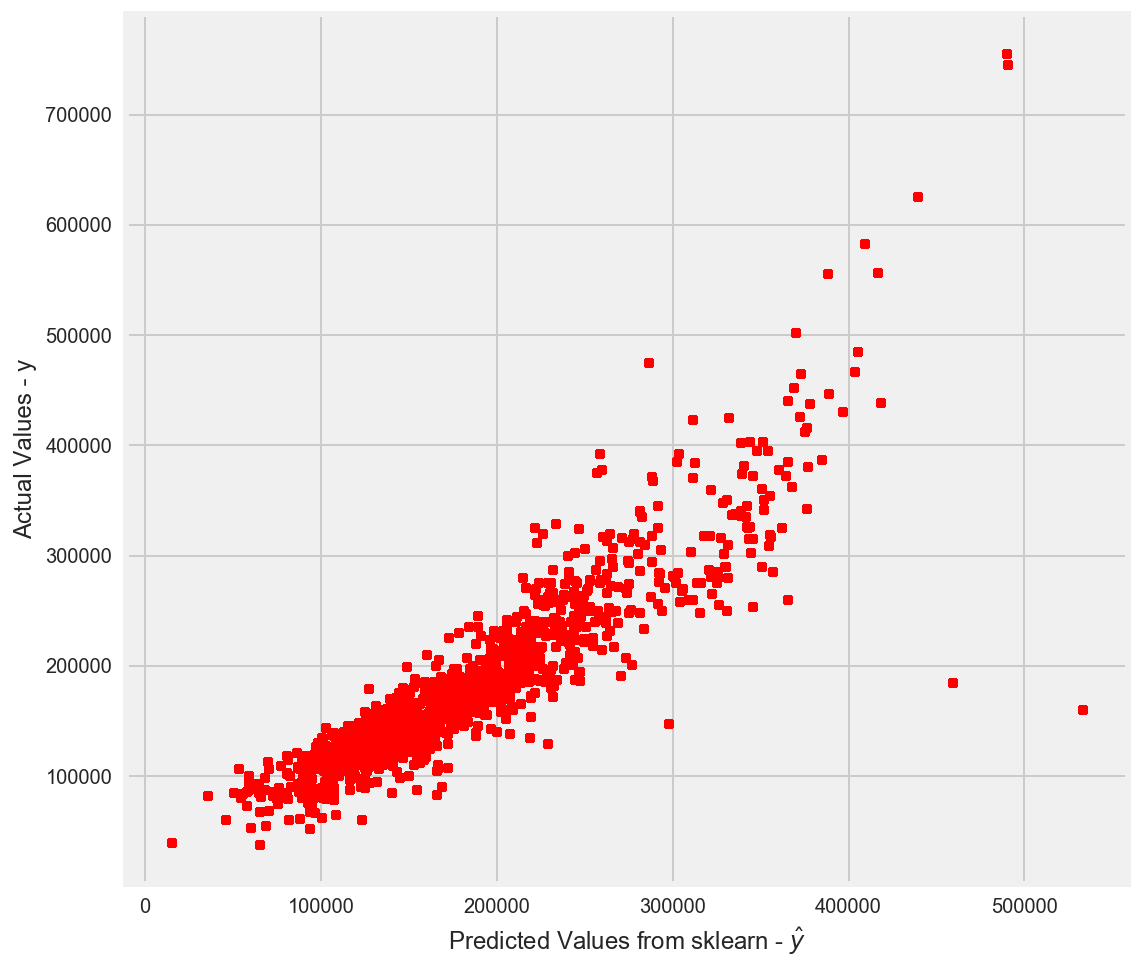

In [35]:
# I will create a linear regression model with sklearn

X_lin = var_lin[var_lin.YrSold != 2010]
X_lin.drop('YrSold', axis=1, inplace=True)

#ss = StandardScaler()
#Xs_lin = ss.fit_transform(X_lin)

linreg = LinearRegression()
lin_model = linreg.fit(X_lin, y_train)

print ("Co-efficients are:")
print (linreg.coef_)
print ()
print ("Intercept is: ", linreg.intercept_)
print ("R-squared is: ", lin_model.score(X_lin, y_train))
lin_predictions  =  lin_model.predict(X_lin)

print ("MSE:", mean_squared_error(y_train, lin_predictions))
print ("RMSE:", np.sqrt(mean_squared_error(y_train, lin_predictions)))

plt.figure(figsize=(8,8))
plt.scatter(lin_predictions, y_train, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from sklearn - $\hat{y}$")
plt.ylabel("Actual Values - y")
plt.show()

In [36]:
# This will be compared to a linear regression model with statsmodel
import statsmodels.api as sm
import patsy

var_lm = var_lin[var_lin.YrSold != 2010]
var_lm['FirstFlrSF'] = var_lm['1stFlrSF']
var_lm['SalePrice'] = house.SalePrice[house.YrSold != 2010]

formula = 'SalePrice ~ GrLivArea + GarageCars + BsmtQual + BsmtExposure + Reno_Age + House_Age + FirstFlrSF + SaleType_New + Neighborhood_Blmngtn + Neighborhood_Blueste + Neighborhood_BrDale + Neighborhood_BrkSide + Neighborhood_ClearCr + Neighborhood_CollgCr + Neighborhood_Crawfor + Neighborhood_Edwards + Neighborhood_Gilbert + Neighborhood_IDOTRR + Neighborhood_MeadowV + Neighborhood_Mitchel + Neighborhood_NoRidge + Neighborhood_NPkVill + Neighborhood_NridgHt + Neighborhood_NWAmes + Neighborhood_OldTown + Neighborhood_SWISU + Neighborhood_Sawyer + Neighborhood_SawyerW + Neighborhood_Somerst + Neighborhood_StoneBr + Neighborhood_Timber + Neighborhood_Veenker + BldgType_2fmCon + BldgType_Duplex + BldgType_TwnhsE + BldgType_Twnhs'
        
y_lm, X_lm = patsy.dmatrices(formula, data=var_lm, return_type='dataframe')

y_lm = y_lm.values.ravel()

lm_model = sm.OLS(y_lm, X_lm).fit()
lm_predictions = lm_model.predict(X_lm)
print ("MSE:", mean_squared_error(y_lm, lm_predictions))
print ("RMSE:", np.sqrt(mean_squared_error(y_lm, lm_predictions)))
lm_model.summary()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


MSE: 1130933217.9
RMSE: 33629.3505424


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     156.1
Date:                Mon, 26 Jun 2017   Prob (F-statistic):               0.00
Time:                        09:12:55   Log-Likelihood:                -15134.
No. Observations:                1278   AIC:                         3.034e+04
Df Residuals:                    1241   BIC:                         3.053e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept             2.194e+04   8623.844      2.544      0.011      5019.954  3.89e+04
GrLivArea               56.0835      2.669     21.013      0.000        50.847    61.320
GarageCars            1.223e+04   1822.008      6.711      0.000      8652.556  1.58e+04
BsmtQual              8388.7198   1640.206      5.114      0.000      5170.837  1.16e+04
BsmtExposure          8742.5116   1062.861      8.225      0.000      6657.308  1.08e+04
Reno_Age              -329.1040     64.494     -5.103      0.000      -455.632  -202.576
House_Age             -268.1632     77.654     -3.453      0.001      -420.510  -115.816
FirstFlrSF              20.3337      3.533      5.756      0.000        13.403    27.265
SaleType_New          1.047e+04   3958.097      2.645      0.008      2704.479  1.82e+04
Neighborhood_Blmngtn  6976.1478   1.03e+04      0.676      0.499     -1.33e+04  2.72e+04
Neighborhood_Blueste  1.295e+04   2.49e+04      0.521      0.603     -3.58e+04  6.17e+04
Neighborhood_BrDale     2.2e+04   1.09e+04      2.012      0.044       549.242  4.35e+04
Neighborhood_BrkSide  5165.5829   5634.960      0.917      0.359     -5889.517  1.62e+04
Neighborhood_ClearCr  4069.5447   7630.735      0.533      0.594     -1.09e+04   1.9e+04
Neighborhood_CollgCr   466.2258   4836.753      0.096      0.923     -9022.890  9955.341
Neighborhood_Crawfor  3.092e+04   5887.519      5.251      0.000      1.94e+04  4.25e+04
Neighborhood_Edwards -1.064e+04   4469.127     -2.381      0.017     -1.94e+04 -1873.416
Neighborhood_Gilbert -6726.8355   5816.727     -1.156      0.248     -1.81e+04  4684.870
Neighborhood_IDOTRR  -3779.3666   7687.150     -0.492      0.623     -1.89e+04  1.13e+04
Neighborhood_MeadowV  2316.2431   1.07e+04      0.217      0.829     -1.87e+04  2.33e+04
Neighborhood_Mitchel -8019.1747   5925.343     -1.353      0.176     -1.96e+04  3605.622
Neighborhood_NoRidge  7.267e+04   7438.646      9.770      0.000      5.81e+04  8.73e+04
Neighborhood_NPkVill  2.445e+04   1.39e+04      1.756      0.079     -2862.927  5.18e+04
Neighborhood_NridgHt  7.111e+04   6289.581     11.305      0.000      5.88e+04  8.34e+04
Neighborhood_NWAmes  -1733.5448   5147.435     -0.337      0.736     -1.18e+04  8365.092
Neighborhood_OldTown -9899.7358   5184.911     -1.909      0.056     -2.01e+04   272.424
Neighborhood_SWISU   -1.122e+04   8267.928     -1.357      0.175     -2.74e+04  5000.232
Neighborhood_Sawyer  -5851.2320   5141.014     -1.138      0.255     -1.59e+04  4234.808
Neighborhood_SawyerW  3360.2247   6028.626      0.557      0.577     -8467.200  1.52e+04
Neighborhood_Somerst  2.589e+04   5993.905      4.319      0.000      1.41e+04  3.76e+04
Neighborhood_StoneBr  8.113e+04   8867.404      9.149      0.000      6.37e+04  9.85e+04
Neighborhood_Timber   1.375e+04   7038.382      1.953    

In [ ]:
# Only some of the Neighborhoods and BldgType_2fmCon are not statistically significant, according to the p value in
# the table above.

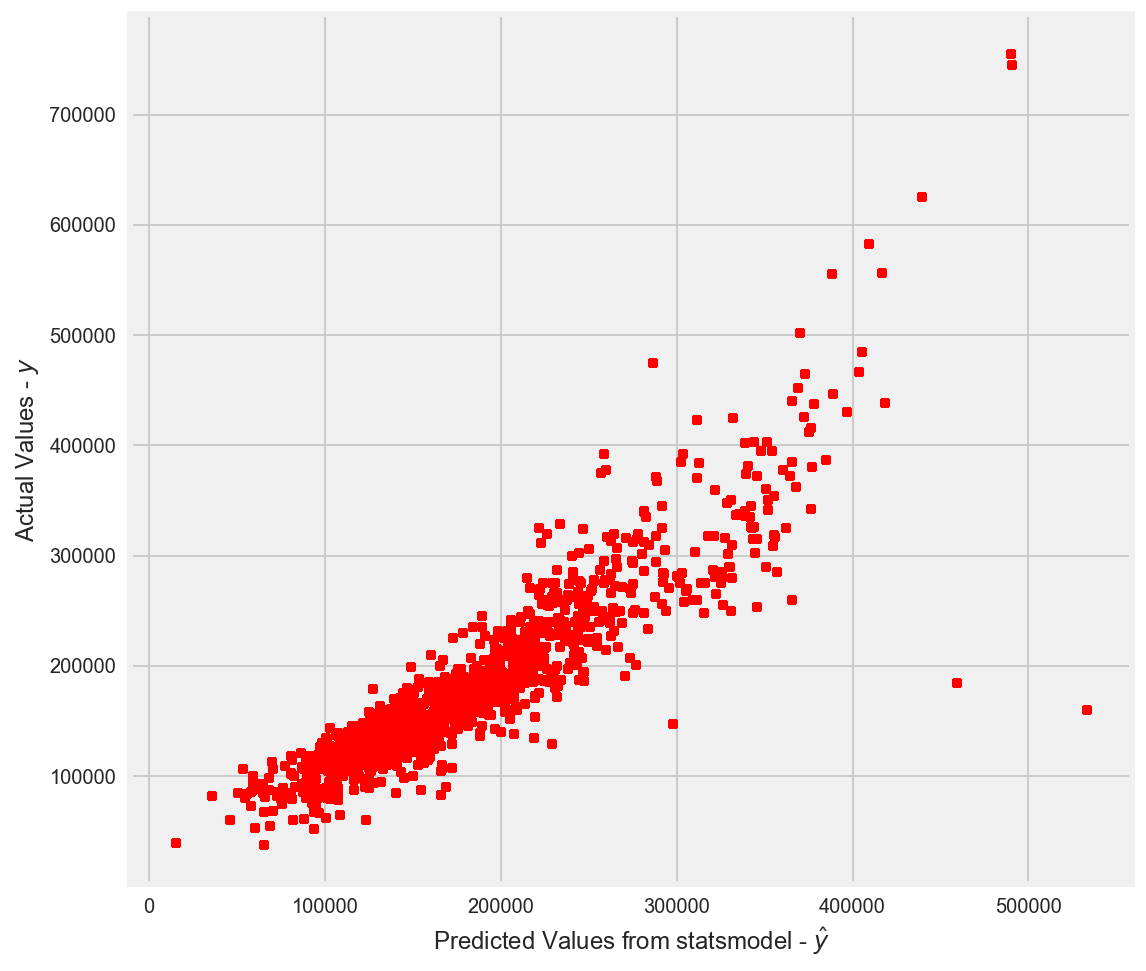

In [37]:
# Plot the model
plt.figure(figsize=(8,8))
plt.scatter(lm_predictions, y_lm, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from statsmodel - $\hat{y}$")
plt.ylabel("Actual Values - $y$")
plt.show()

In [ ]:
# There is no difference between the models, but it's nice to be able to see the full summary that statsmodel offers.

# I'm also going to create a model with every variable that Lasso gave a non-zero coefficient.

In [38]:
lasso_var = []
for i in range(len(lasso_coefs)):
    if lasso_coefs.loc[i, 'coef'] != 0:
        lasso_var.append(lasso_coefs.loc[i, 'variable'])
lasso_var.append('YrSold')
print (len(lasso_var))

66


In [39]:
var_lm2 = var_fix[[col for col in var_fix.columns if col in (lasso_var)]]
print (var_lm2.shape)

(1450, 66)


In [40]:
X_lm2 = var_lm2[var_lm2.YrSold != 2010]
X_lm2.drop('YrSold', axis=1, inplace=True)

X_lm2 = sm.add_constant(X_lm2)       # statsmodel doesn't fit the intercept by default, so a constant needs to be added
lm_model_2 = sm.OLS(y_train, X_lm2)
lm_model_2 = lm_model_2.fit()
lm_predictions_2 = lm_model_2.predict()

print ("MSE:", mean_squared_error(y_train, lm_predictions_2))
print ("RMSE:", np.sqrt(mean_squared_error(y_train, lm_predictions_2)))

lm_model_2.summary()

MSE: 940764316.813
RMSE: 30671.8815336


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     107.0
Date:                Mon, 26 Jun 2017   Prob (F-statistic):               0.00
Time:                        09:13:15   Log-Likelihood:                -15017.
No. Observations:                1278   AIC:                         3.016e+04
Df Residuals:                    1213   BIC:                         3.050e+04
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
const                  4.157e+04   1.13e+04      3.665      0.000      1.93e+04  6.38e+04
LotArea                   0.2159      0.098      2.197      0.028         0.023     0.409
MasVnrArea               19.9000      5.980      3.328      0.001         8.169    31.631
BsmtQual               8782.0030   1946.569      4.512      0.000      4962.987  1.26e+04
BsmtExposure           6586.0632   1081.186      6.092      0.000      4464.860  8707.266
BsmtFinSF1                8.0140      2.982      2.687      0.007         2.163    13.865
1stFlrSF                 10.3217      3.619      2.852      0.004         3.221    17.423
GrLivArea                49.3363      4.280     11.527      0.000        40.940    57.733
BsmtFullBath           5658.5463   2394.730      2.363      0.018       960.274  1.04e+04
FullBath               7400.7502   2634.439      2.809      0.005      2232.187  1.26e+04
BedroomAbvGr          -6445.0525   1762.206     -3.657      0.000     -9902.362 -2987.743
KitchenAbvGr          -2.373e+04   6305.988     -3.763      0.000     -3.61e+04 -1.14e+04
TotRmsAbvGrd           2889.8977   1243.202      2.325      0.020       450.832  5328.963
Fireplaces             5199.3674   1795.191      2.896      0.004      1677.344  8721.391
GarageCars              1.12e+04   1733.694      6.461      0.000      7799.955  1.46e+04
WoodDeckSF               18.4717      8.015      2.305      0.021         2.748    34.196
OpenPorchSF              10.0344     15.338      0.654      0.513       -20.057    40.126
3SsnPorch                58.4289     29.760      1.963      0.050         0.041   116.816
ScreenPorch              65.4410     16.863      3.881      0.000        32.358    98.524
House_Age              -192.4731     65.145     -2.955      0.003      -320.282   -64.664
Reno_Age               -283.4579     61.231     -4.629      0.000      -403.589  -163.327
Alley_Grvl            -3214.3073   5569.647     -0.577      0.564     -1.41e+04  7712.904
GarageType_2Types     -3.147e+04   1.36e+04     -2.317      0.021     -5.81e+04 -4822.255
GarageType_CarPort    -2.528e+04   1.26e+04     -2.003      0.045        -5e+04  -519.840
MiscFeature_TenC      -5.118e+04   3.28e+04     -1.560      0.119     -1.16e+05  1.32e+04
MSSubClass_160        -8802.5831   6792.546     -1.296      0.195     -2.21e+04  4523.859
MSSubClass_90         -1218.4783   3656.999     -0.333      0.739     -8393.224  5956.267
MSZoning_RM           -1006.9224   3694.801     -0.273      0.785     -8255.833  6241.988
LandContour_Bnk       -1.235e+04   4515.129     -2.735      0.006     -2.12e+04 -3489.210
LandContour_HLS        7974.8629   5200.327      1.534      0.125     -2227.772  1.82e+04
LotConfig_CulDSac      7325.6504   3853.120      1.901      0.058      -233.869  1.49e+04
LotConfig_FR2         -

In [ ]:
# This model has a higher R-squared and lower RMSE. The adjusted R-squared is only slightly less than the R-squared,
# which indicates that even though there are 65 predictor variables as opposed to 34 in the previous model, most of
# them are contributing.

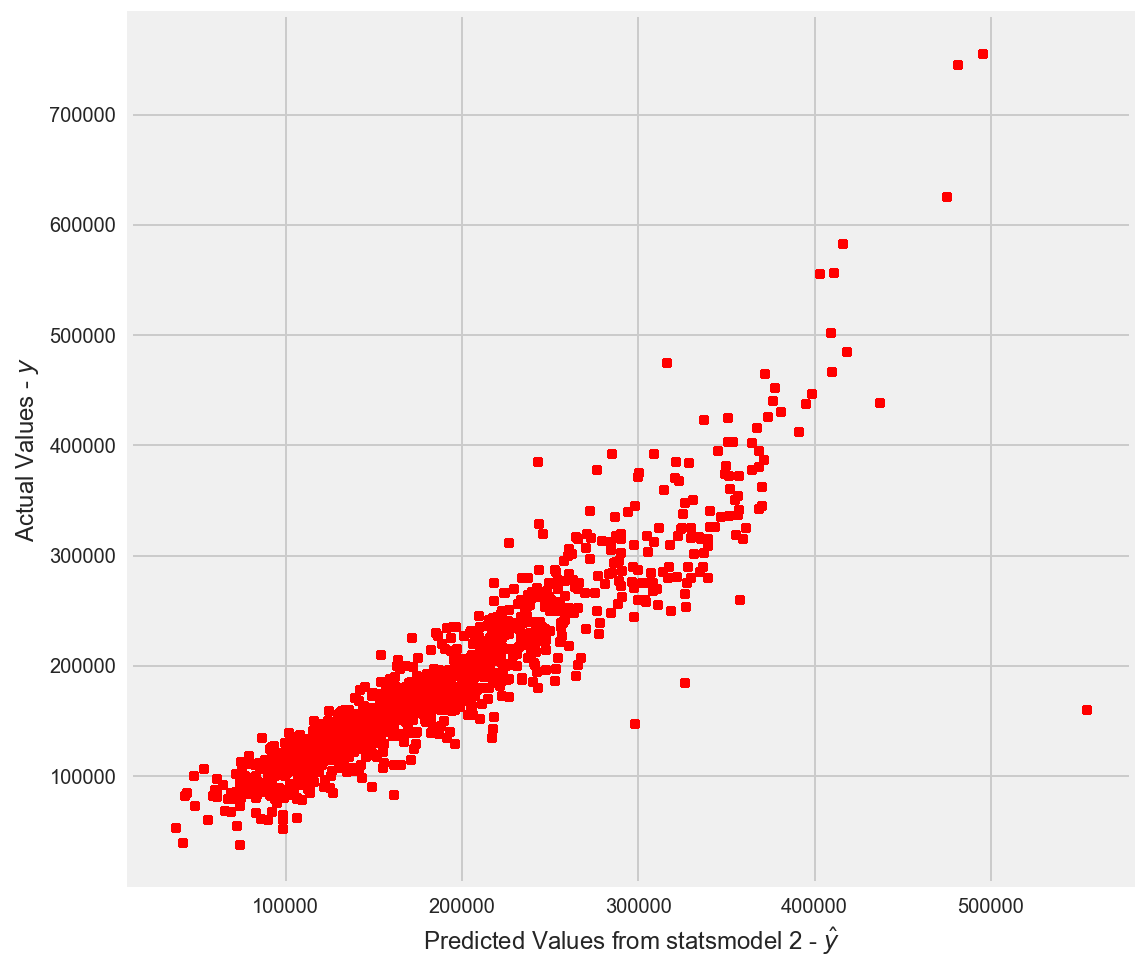

In [41]:
# Plot the model
plt.figure(figsize=(8,8))
plt.scatter(lm_predictions_2, y_train, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from statsmodel 2 - $\hat{y}$")
plt.ylabel("Actual Values - $y$")
plt.show()

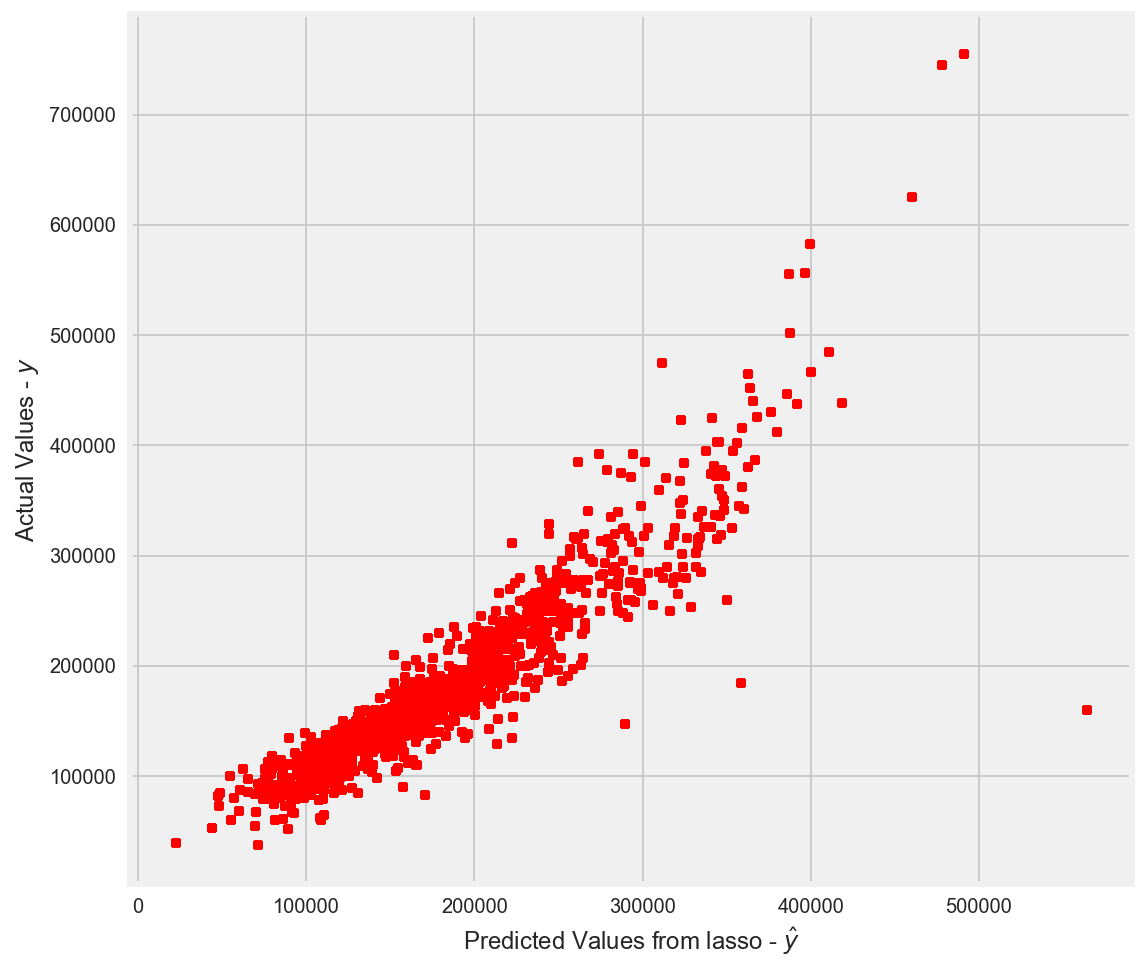

In [42]:
# This should be much the same as using the actual Lasso prediction
plt.figure(figsize=(8,8))
plt.scatter(lasso.predict(Xs), y_train, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from lasso - $\hat{y}$")
plt.ylabel("Actual Values - $y$")
plt.show()

In [43]:
# Now to see how the two models go with predicting the SalePrice for 2010 sales. I need to get the 2010 values.
X_2010 = var_lin[var_lin.YrSold == 2010]
X_2010.drop('YrSold', axis=1, inplace=True)
y_2010 = house.SalePrice[house.YrSold == 2010]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


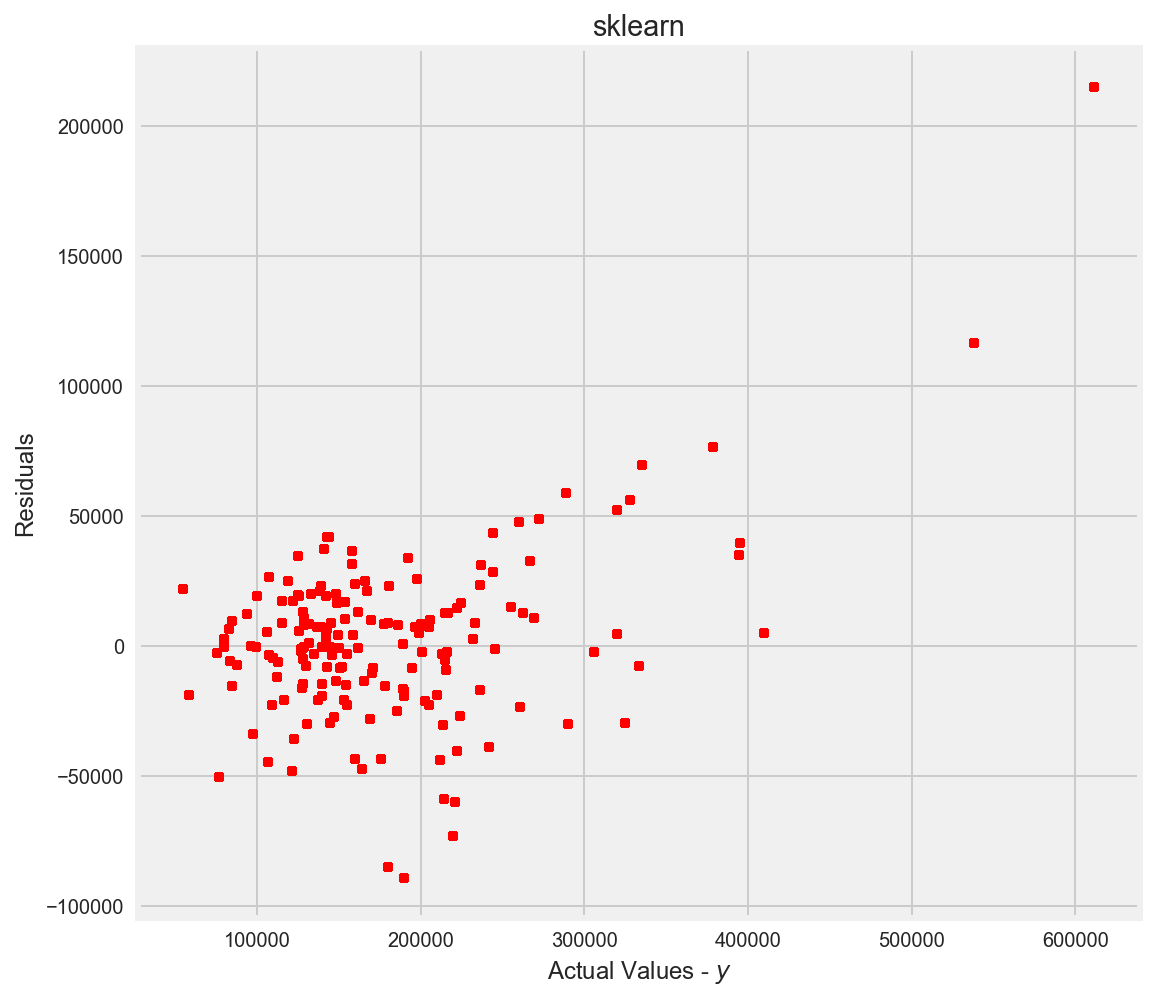

In [44]:
# First with sklearn
pred_skl_2010 =  lin_model.predict(X_2010)
resid_skl_2010 = y_2010 - pred_skl_2010

# I will plot the residuals, i.e. the differece between the predicted and actual values
plt.figure(figsize=(8,8))
plt.scatter(y_2010, resid_skl_2010, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Actual Values - $y$")
plt.ylabel("Residuals")
plt.title("sklearn")
plt.show()

In [45]:
X_2010_sm = var_lin[var_lin.YrSold == 2010]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


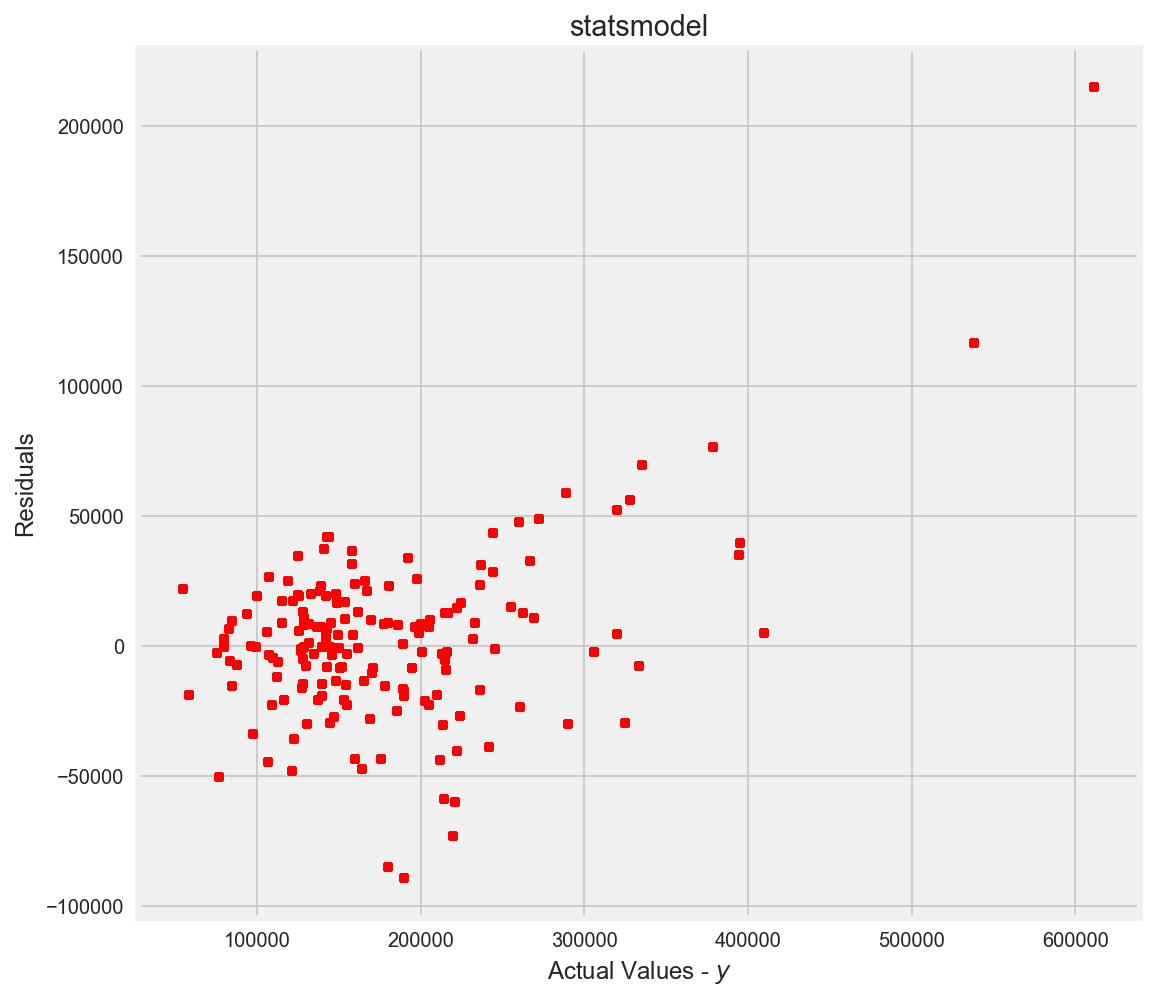

In [46]:
# Now with statsmodel number one
X_2010_sm = var_lin[var_lin.YrSold == 2010]
X_2010_sm['FirstFlrSF'] = X_2010_sm['1stFlrSF']
X_2010_sm['SalePrice'] = house.SalePrice[house.YrSold == 2010]

y_2010_sm, X_2010_sm = patsy.dmatrices(formula, data=X_2010_sm, return_type='dataframe')

pred_sm_2010 =  lm_model.predict(X_2010_sm)
resid_sm_2010 = y_2010 - pred_sm_2010

plt.figure(figsize=(8,8))
plt.scatter(y_2010, resid_sm_2010, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Actual Values - $y$")
plt.ylabel("Residuals")
plt.title("statsmodel")
plt.show()

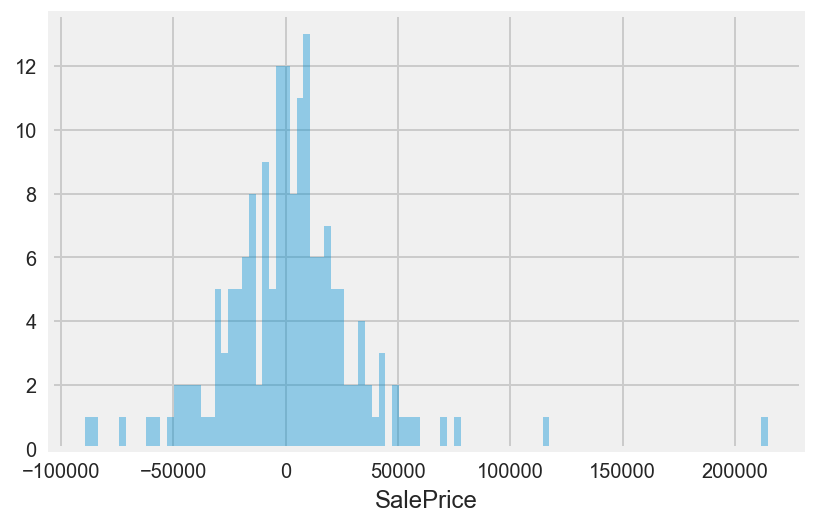

In [47]:
# A plot of the residuals
sns.distplot(resid_sm_2010, bins = 100, kde=False)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


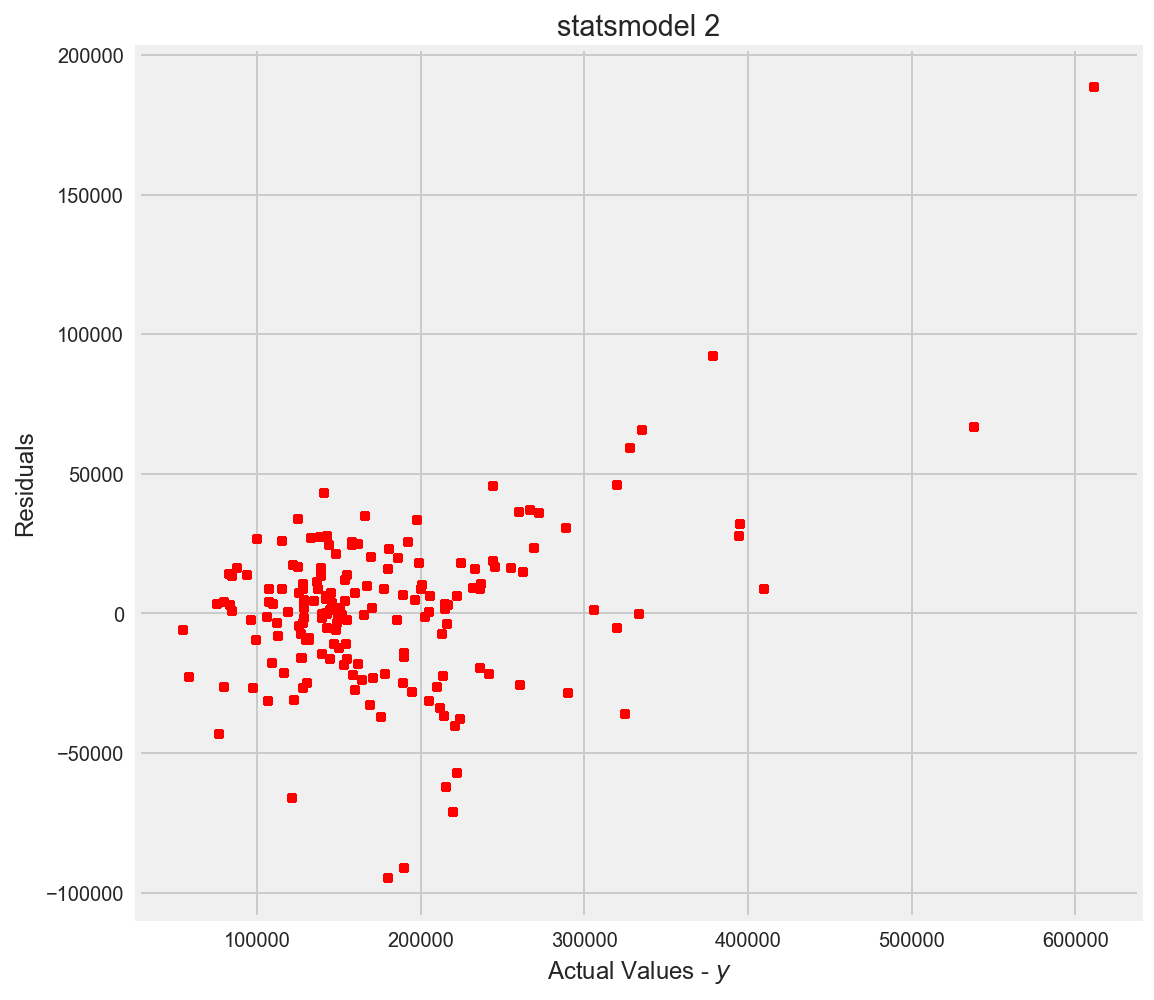

In [48]:
# Now with statsmodel number two
X_2010_sm_2 = var_lm2[var_lm2.YrSold == 2010]
X_2010_sm_2.drop('YrSold', axis=1, inplace=True)

# I found that the sm.add_constant function wasn't working. This is because some of the variables only have one
# value, so the function thinks that a constant is already present, and it doesn't add one by default. I have to force
# it to add one.
X_2010_sm_2 = sm.add_constant(X_2010_sm_2, has_constant = 'add') 

pred_sm_2010_2 =  lm_model_2.predict(X_2010_sm_2)
resid_sm_2010_2 = y_2010 - pred_sm_2010_2

plt.figure(figsize=(8,8))
plt.scatter(y_2010, resid_sm_2010_2, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Actual Values - $y$")
plt.ylabel("Residuals")
plt.title("statsmodel 2")
plt.show()

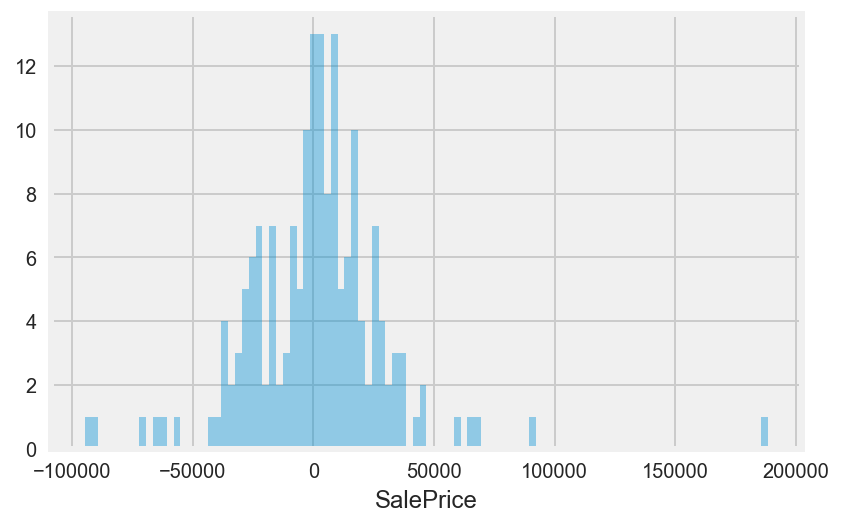

In [49]:
# A plot of the residuals
sns.distplot(resid_sm_2010_2, bins = 100, kde=False)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Determine any value of *changeable* property characteristics unexplained by the *fixed* ones.

---

Now that you have a model that estimates the price of a house based on its static characteristics, we can move forward with part 2 and 3 of the plan: what are the costs/benefits of quality, condition, and renovations?

There are two specific requirements for these estimates:
1. The estimates of effects must be in terms of dollars added or subtracted from the house value. 
2. The effects must be on the variance in price remaining from the first model.

The residuals from the first model (training and testing) represent the variance in price unexplained by the fixed characteristics. Of that variance in price remaining, how much of it can be explained by the easy-to-change aspects of the property?

---

**Your goals:**
1. Evaluate the effect in dollars of the renovate-able features. 
- How would your company use this second model and its coefficients to determine whether they should buy a property or not? Explain how the company can use the two models you have built to determine if they can make money. 
- Investigate how much of the variance in price remaining is explained by these features.
- Do you trust your model? Should it be used to evaluate which properties to buy and fix up?

In [ ]:
# Basically, to answer the questions above, I will build another regression model. This model will have the
# residuals above as the dependent variable, with the remaining variables in var_ren, that can be changed, as
# the independent variables. I will use the residuals from the third model built above.

In [50]:
var_ren.columns

Index(['Utilities', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'BsmtCond', 'BsmtFinType1', 'BsmtFinType2', 'BsmtUnfSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'LowQualFinSF', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'PoolQC', 'Fence', 'YrSold'],
      dtype='object')

In [80]:
# I will separate out the column names of the object type variables.
var_ren_obj = [col for col in var_ren.columns if var_ren.dtypes[col] == 'object']
print (len(var_ren_obj))
print (var_ren_obj)

11
['Utilities', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Heating', 'CentralAir', 'Electrical', 'PavedDrive', 'Fence']


In [71]:
for i in var_ren.columns:
    if var_ren.dtypes[i] == 'object':
        print(var_ren[i].value_counts())

AllPub    1449
NoSeWa       1
Name: Utilities, dtype: int64
Gable      1135
Hip         283
Flat         13
Gambrel      10
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64
CompShg    1424
Tar&Grv      11
WdShngl       6
WdShake       5
Membran       1
Roll          1
Metal         1
ClyTile       1
Name: RoofMatl, dtype: int64
VinylSd    515
HdBoard    222
MetalSd    215
Wd Sdng    204
Plywood    107
CemntBd     61
BrkFace     49
WdShing     26
Stucco      25
AsbShng     19
Stone        2
BrkComm      2
AsphShn      1
CBlock       1
ImStucc      1
Name: Exterior1st, dtype: int64
VinylSd    504
MetalSd    209
HdBoard    207
Wd Sdng    195
Plywood    141
CemntBd     60
WdShing     38
Stucco      26
BrkFace     24
AsbShng     19
ImStucc     10
BrkComm      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64
None       862
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
GasA     1419
GasW       17
Grav     

In [81]:
# These will need to have dummy variables created. I will start with MasVnrType, which includes a value of None
# and make this the dummy variable to drop. The original column will also be dropped.

for i in ['Fence', 'MasVnrType']:
    dummy = pd.get_dummies(var_ren[i], prefix=i)
    dummy.drop(i+'_None', axis=1, inplace=True)
    var_ren = pd.concat([var_ren, dummy], axis=1)
    var_ren.drop(i, axis=1, inplace=True)

In [82]:
# For the others, I will drop the value that occurs the most.
for i in ['Utilities', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'Heating', 'CentralAir', 'Electrical',
          'PavedDrive']:
    top_value = var_ren[i].value_counts().keys()[0]
    dummy = pd.get_dummies(var_ren[i], prefix=i)
    dummy.drop(i + '_' + top_value, axis=1, inplace=True)
    var_ren = pd.concat([var_ren, dummy], axis=1)
    var_ren.drop(i, axis=1, inplace=True)
var_ren.shape

(1450, 79)

In [83]:
# This model will be using the residuals for all years, so I'll calculate them again now, as above they were
# calculated in two lots, 2006-09 and 2010.

X_lm2_all = var_lm2.copy(deep=True)
X_lm2_all.drop('YrSold', axis=1, inplace=True)
X_lm2_all = sm.add_constant(X_lm2_all, has_constant = 'add')
residuals_all = house['SalePrice'] - lm_model_2.predict(X_lm2_all)

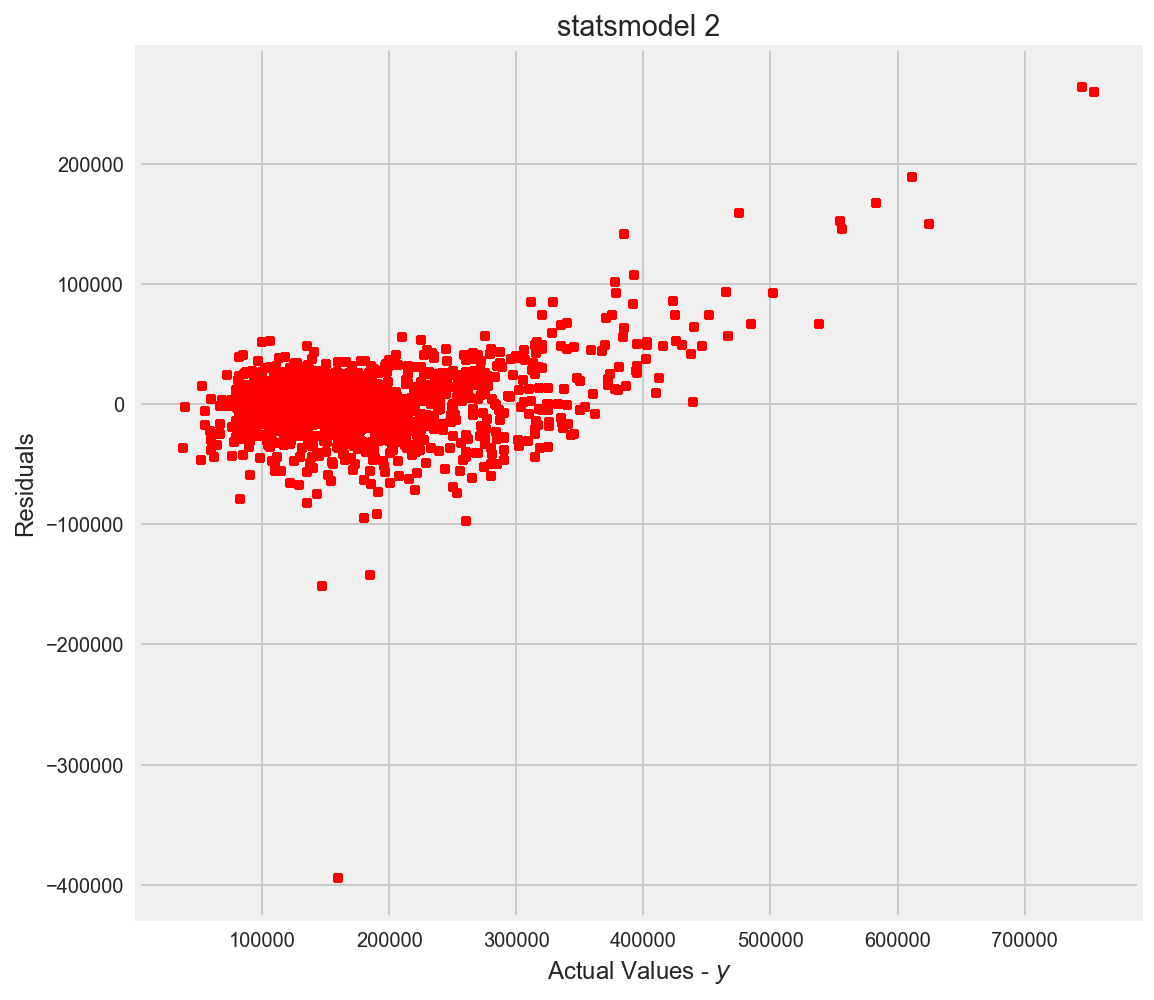

In [84]:
# I'll plot all the residuals against the actual values
plt.figure(figsize=(8,8))
plt.scatter(house['SalePrice'], residuals_all, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Actual Values - $y$")
plt.ylabel("Residuals")
plt.title("statsmodel 2")
plt.show()

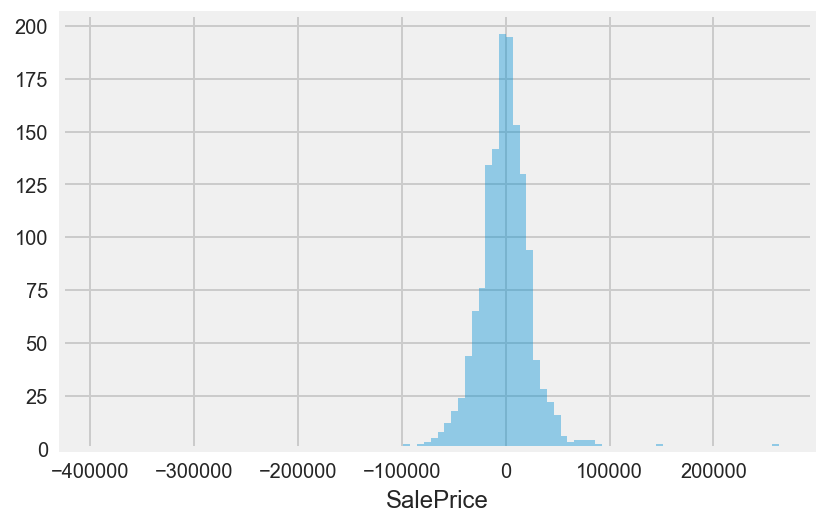

In [85]:
# A plot of the residuals
sns.distplot(residuals_all, bins = 100, kde=False)

In [93]:
# I'll save the residuals to .csv for later use
np.savetxt('./part_one_residuals.csv', residuals_all)
house.to_csv('./house.csv')

In [86]:
# I'll undertake the same process as in part one, using Ridge, Lasso and ElasticNet.
y_ren = residuals_all
X_ren = var_ren.copy(deep=True)
X_ren.drop('YrSold', axis=1, inplace=True)

In [87]:
X_ren.shape

(1450, 78)

In [88]:
# I will scale the variables, using the fit_transform function. 
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
Xs_ren = ss.fit_transform(X_ren)

In [89]:
# The RidgeCV function finds the optimal alpha for Ridge
ridge_alphas = np.logspace(0, 5, 200)
optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(Xs_ren, y_ren)
print (optimal_ridge.alpha_)

517.09202429


In [90]:
# Now I can calculate the R-squared score for Ridge
ridge = Ridge(alpha=optimal_ridge.alpha_)
ridge_scores = cross_val_score(ridge, Xs_ren, y_ren, cv=10)
print (ridge_scores)
print (np.mean(ridge_scores))

[ 0.10162756  0.11876298  0.12422502  0.07004606  0.23177189  0.09151018
  0.11287913  0.07517563  0.03180185  0.08847975]
0.104628004604


In [91]:
# The LassoCV function finds the optimal alpha for Ridge
optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=1)
optimal_lasso.fit(Xs_ren, y_ren)
print (optimal_lasso.alpha_)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

566.243241418


.................................................................................[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    3.1s finished


In [92]:
# Now I can calculate the R-squared score for Lasso
lasso = Lasso(alpha=optimal_lasso.alpha_)
lasso_scores = cross_val_score(lasso, Xs_ren, y_ren, cv=10)
print (lasso_scores)
print (np.mean(lasso_scores))

[ 0.05443685  0.0662109   0.13806715  0.06906     0.25842239  0.10018792
  0.11866085  0.06399334  0.04747669  0.11782619]
0.103434228858


In [93]:
# We can see the co-efficient scores that Lasso calculated:
lasso.fit(Xs_ren, y_ren)
lasso_coefs = pd.DataFrame({'variable':X_ren.columns,
                            'coef':lasso.coef_,
                            'abs_coef':np.abs(lasso.coef_)})

In [94]:
lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)
print ('Percent variables zeroed out:', np.sum((lasso.coef_ == 0))/float(X_ren.shape[1]))
lasso_coefs.head(36)

Percent variables zeroed out: 0.551282051282


,abs_coef,coef,variable
30,11855.093583,-11855.093583,RoofMatl_ClyTile
36,4924.590655,4924.590655,RoofMatl_WdShngl
0,4461.083200,4461.083200,OverallQual
16,3976.564268,3976.564268,PoolQC
1,3836.885098,3836.885098,OverallCond
11,3326.293665,3326.293665,Functional
40,2644.766642,2644.766642,Exterior1st_BrkFace
27,2279.757667,2279.757667,RoofStyle_Hip
15,2107.530341,-2107.530341,GarageCond
13,1766.390633,1766.390633,GarageFinish


In [95]:
# The same process for ElasticNet. It will return two values - the optimal alpha as well as the proportion of lasso
# and ridge to use (0 = all ridge, 1 = all lasso)

l1_ratios = np.linspace(0.01, 1.0, 25)
optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=100, cv=10,
                            verbose=1)
optimal_enet.fit(Xs_ren, y_ren)
print (optimal_enet.alpha_)
print (optimal_enet.l1_ratio_)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

553.096370738
1.0


...................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    9.9s finished


In [96]:
# ElasticNet returned a ratio of 1.0 again,  meaning it will use all Lasso. This may be because the large number of 
# variables is more important than collinearity. I will take a look at the R-squared from ElasticNet anyway.

enet = ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_)
enet_scores = cross_val_score(enet, Xs_ren, y_ren, cv=10)
print (enet_scores)
print (np.mean(enet_scores))

[ 0.05436905  0.06475677  0.13824119  0.06907976  0.25959301  0.09985379
  0.11908004  0.06299887  0.04738305  0.11816733]
0.103352286073


In [144]:
# Since the scores for both Ridge and Lasso were almost the same anyway, ElasticNet hasn't made an improvement.

# Now I will make a regression model for the residuals using the Lasso co-efficients.

In [97]:
lasso_ren_var = []
for i in range(len(lasso_coefs)):
    if lasso_coefs.loc[i, 'coef'] != 0:
        lasso_ren_var.append(lasso_coefs.loc[i, 'variable'])
print (len(lasso_ren_var))

35


In [98]:
var_ren_lm = var_ren[[col for col in var_ren.columns if col in (lasso_ren_var)]]
print (var_ren_lm.shape)

(1450, 35)


In [99]:
X_ren_lm = var_ren_lm.copy(deep=True)
X_ren_lm = sm.add_constant(X_ren_lm)    # statsmodel doesn't fit the intercept by default;a constant needs to be added
ren_model = sm.OLS(y_ren, X_ren_lm)
ren_model = ren_model.fit()
ren_predictions = ren_model.predict()

In [100]:
print ("MSE:", mean_squared_error(y_ren, ren_predictions))
print ("RMSE:", np.sqrt(mean_squared_error(y_ren, ren_predictions)))

ren_model.summary()

MSE: 635078098.46
RMSE: 25200.7559105


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     18.98
Date:                Mon, 26 Jun 2017   Prob (F-statistic):           5.67e-94
Time:                        10:04:57   Log-Likelihood:                -16753.
No. Observations:                1450   AIC:                         3.358e+04
Df Residuals:                    1414   BIC:                         3.377e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
const               -8.053e+04   9507.353     -8.470      0.000     -9.92e+04 -6.19e+04
OverallQual          4447.8149    786.030      5.659      0.000      2905.905  5989.725
OverallCond          3943.7683    646.594      6.099      0.000      2675.381  5212.156
BsmtCond            -3793.8172   1314.591     -2.886      0.004     -6372.576 -1215.058
BsmtUnfSF              -3.6851      1.653     -2.230      0.026        -6.927    -0.443
LowQualFinSF          -39.9992     14.820     -2.699      0.007       -69.070   -10.928
KitchenQual          2875.3571   1408.303      2.042      0.041       112.770  5637.944
Functional           5716.5469   1063.775      5.374      0.000      3629.800  7803.294
FireplaceQu         -1422.2746    438.064     -3.247      0.001     -2281.600  -562.949
GarageFinish         2042.7765    634.579      3.219      0.001       797.958  3287.595
GarageCond          -4242.9016   1031.209     -4.114      0.000     -6265.765 -2220.038
PoolQC               2.409e+04   3794.602      6.347      0.000      1.66e+04  3.15e+04
Fence_GdPrv         -4748.5155   3575.605     -1.328      0.184     -1.18e+04  2265.546
Fence_MnPrv          1929.4411   2247.547      0.858      0.391     -2479.444  6338.326
MasVnrType_BrkCmn   -7519.1655   6771.173     -1.110      0.267     -2.08e+04  5763.460
MasVnrType_BrkFace  -3550.8214   1565.583     -2.268      0.023     -6621.936  -479.707
Utilities_NoSeWa    -2.555e+04   2.58e+04     -0.991      0.322     -7.61e+04   2.5e+04
RoofStyle_Hip        6789.0405   1775.236      3.824      0.000      3306.660  1.03e+04
RoofMatl_ClyTile    -4.984e+05   2.83e+04    -17.637      0.000     -5.54e+05 -4.43e+05
RoofMatl_Membran     3.987e+04   2.59e+04      1.540      0.124     -1.09e+04  9.07e+04
RoofMatl_Tar&Grv    -1.238e+04   8030.498     -1.542      0.123     -2.81e+04  3367.988
RoofMatl_WdShngl     8.694e+04   1.07e+04      8.128      0.000       6.6e+04  1.08e+05
Exterior1st_BrkFace  1.779e+04   3860.312      4.608      0.000      1.02e+04  2.54e+04
Exterior1st_CemntBd   1.44e+04   1.51e+04      0.951      0.342     -1.53e+04  4.41e+04
Exterior1st_ImStucc -4.866e+04   2.73e+04     -1.783      0.075     -1.02e+05  4873.891
Exterior1st_MetalSd  4454.0784   1983.742      2.245      0.025       562.685  8345.472
Exterior1st_Stucco   6631.0518   5418.105      1.224      0.221     -3997.336  1.73e+04
Exterior2nd_BrkComm  1.319e+04   9818.664      1.344      0.179     -6068.988  3.25e+04
Exterior2nd_CemntBd -4199.2798   1.53e+04     -0.275      0.783     -3.41e+04  2.58e+04
Exterior2nd_ImStucc  2.026e+04   8745.598      2.317      0.021      3105.742  3.74e+04
Exterior2nd_Other   -4.128e+04   2.56e+04     -1.613      0.107     -9.15e+04  8935.840
Exterior2nd_Plywood -2603.9847   2414.847     -1.078      0.281     -7341.052  2133.083
Ext

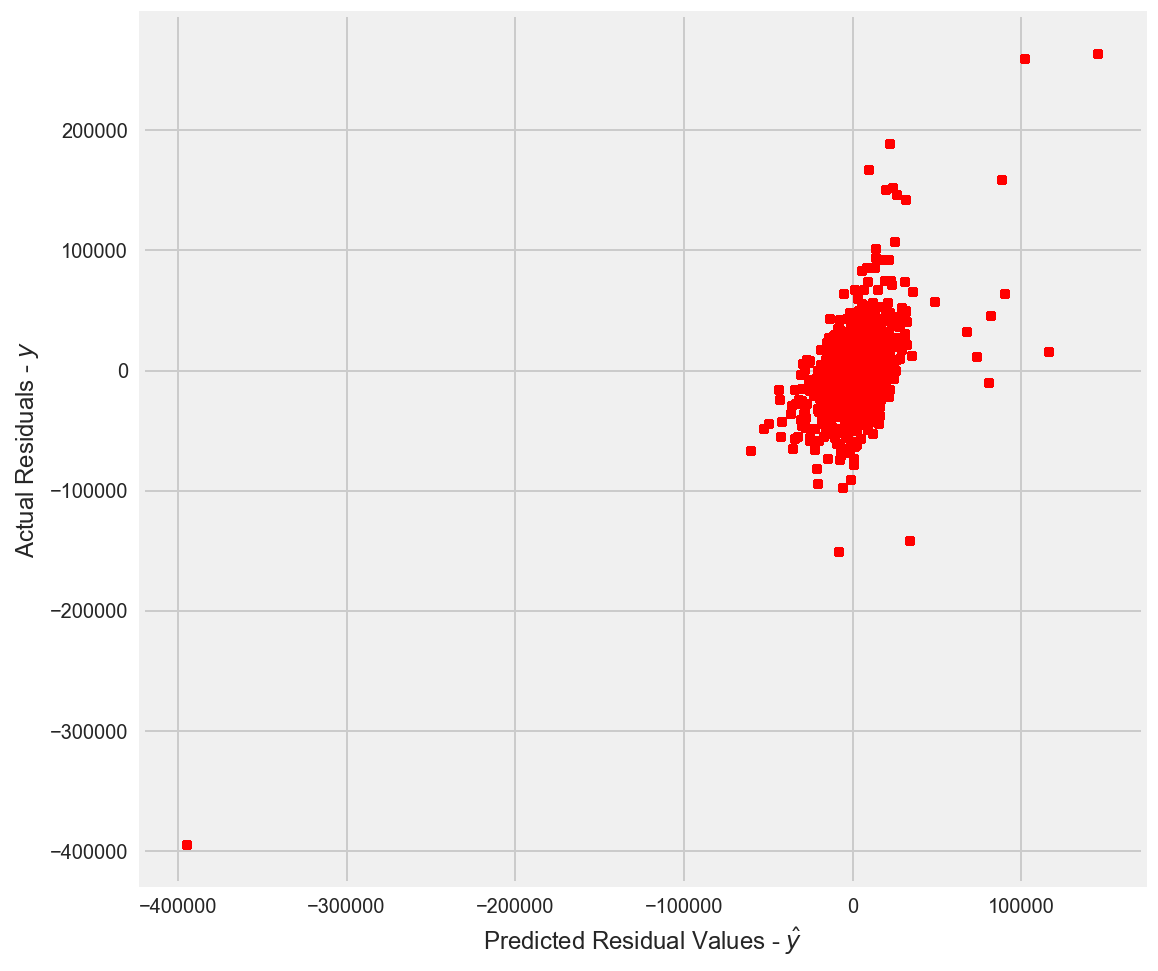

In [76]:
# Plot the model
plt.figure(figsize=(8,8))
plt.scatter(ren_predictions, y_ren, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Residual Values - $\hat{y}$")
plt.ylabel("Actual Residuals - $y$")
plt.show()

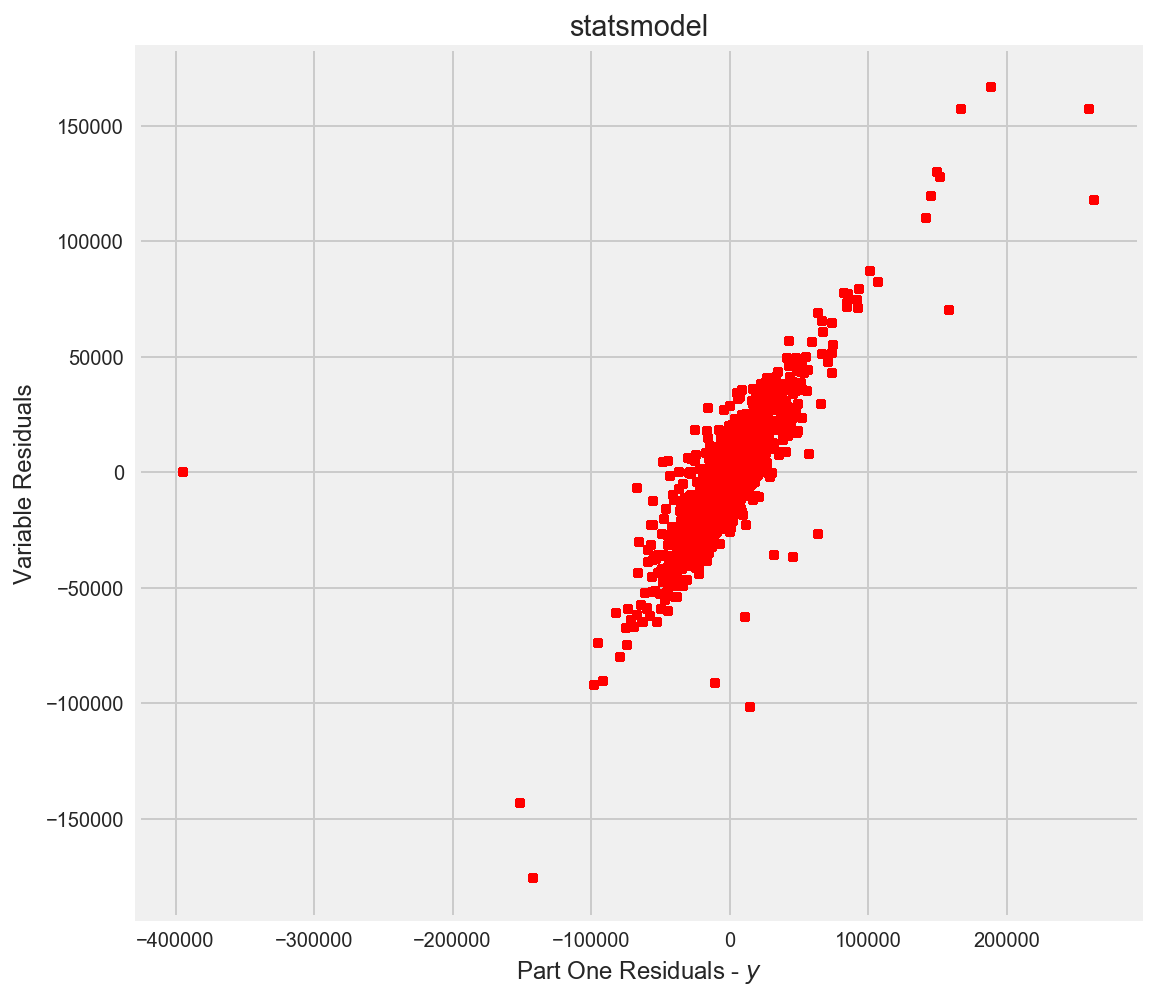

In [77]:
plt.figure(figsize=(8,8))
plt.scatter(y_ren, (y_ren - ren_predictions), s=30, c='r', marker='+', zorder=10)
plt.xlabel("Part One Residuals - $y$")
plt.ylabel("Variable Residuals")
plt.title("statsmodel")
plt.show()

In [101]:
var_ren_drop = []
for i in ['Utilities', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'Heating', 'CentralAir', 'Electrical',
          'PavedDrive']:
    top_value = house[i].value_counts().keys()[0]
    var_ren_drop.append(top_value)
print (var_ren_drop)

['AllPub', 'Gable', 'CompShg', 'VinylSd', 'VinylSd', 'GasA', 'Y', 'SBrkr', 'Y']


The model for the residuals was not very successful, with a low R-squared score and the plot showing that only a small part of the residuals from part one was accounted for. Still, the results show that the following areas are the best targets for renovation to increase the value of a property:


<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. What property characteristics predict an "abnormal" sale?

---

The `SaleCondition` feature indicates the circumstances of the house sale. From the data file, we can see that the possibilities are:

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)
       
One of the executives at your company has an "in" with higher-ups at the major regional bank. His friends at the bank have made him a proposal: if he can reliably indicate what features, if any, predict "abnormal" sales (foreclosures, short sales, etc.), then in return the bank will give him first dibs on the pre-auction purchase of those properties (at a dirt-cheap price).

He has tasked you with determining (and adequately validating) which features of a property predict this type of sale. 

---

**Your task:**
1. Determine which features predict the `Abnorml` category in the `SaleCondition` feature.
- Justify your results.

This is a challenging task that tests your ability to perform classification analysis in the face of severe class imbalance. You may find that simply running a classifier on the full dataset to predict the category ends up useless: when there is bad class imbalance classifiers often tend to simply guess the majority class.

It is up to you to determine how you will tackle this problem. I recommend doing some research to find out how others have dealt with the problem in the past. Make sure to justify your solution. Don't worry about it being "the best" solution, but be rigorous.

Be sure to indicate which features are predictive (if any) and whether they are positive or negative predictors of abnormal sales.

In [5]:
# A: